#### Downloading the imd data for rain and extracting the data as .xlsx

In [2]:
pip install imdlib



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importing relevant Libraries and download imd data

In [3]:
import pandas as pd
import imdlib as imd
import os
import matplotlib.pyplot as plt

In [6]:
start_yr = 1950
end_yr = 2023
variable = 'rain'
# Specify the directory where you want to download and store data (replace with your desired path)
download_dir = r'C:\Users\harsh\Desktop\Btech_project\Dataset'

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

print(f"Directory created at: {download_dir}")


Directory created at: C:\Users\harsh\Desktop\Btech_project\Dataset


#### Downloading the dataset

In [4]:
# # Download the data using the 'download_data' function first
# imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

# # Now, open the downloaded data
# data = imd.open_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

Downloading: rain for year 1950
Downloading: rain for year 1951
Downloading: rain for year 1952
Downloading: rain for year 1953
Downloading: rain for year 1954
Downloading: rain for year 1955
Downloading: rain for year 1956
Downloading: rain for year 1957
Downloading: rain for year 1958
Downloading: rain for year 1959
Downloading: rain for year 1960
Downloading: rain for year 1961
Downloading: rain for year 1962
Downloading: rain for year 1963
Downloading: rain for year 1964
Downloading: rain for year 1965
Downloading: rain for year 1966
Downloading: rain for year 1967
Downloading: rain for year 1968
Downloading: rain for year 1969
Downloading: rain for year 1970
Downloading: rain for year 1971
Downloading: rain for year 1972
Downloading: rain for year 1973
Downloading: rain for year 1974
Downloading: rain for year 1975
Downloading: rain for year 1976
Downloading: rain for year 1977
Downloading: rain for year 1978
Downloading: rain for year 1979
Downloading: rain for year 1980
Download

In [7]:
# Open the downloaded data using the 'open_data' function
data = imd.open_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

# Convert the data to an xarray Dataset object for easier manipulation
ds = data.get_xarray()

print(ds)

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 27028, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    rain     (time, lat, lon) float64 4GB -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-10-23 07:04:05.761462 Python
    references:   
    comment:      
    crs:          epsg:4326


### Rainfall Dataset Overview

This dataset contains **gridded rainfall data** from **1950 to 2002** based on daily measurements across a specified region. It is sourced from the **India Meteorological Department (IMD)** and formatted according to **CF-1.7 conventions**.

#### Dataset Dimensions:
- **Time**: 19,358 daily records (from 1950-01-01 to 2002-12-31).
- **Latitude**: 129 grid points, ranging from approximately 6.5°N to 38.5°N.
- **Longitude**: 135 grid points, ranging from approximately 66.5°E to 100.0°E.

#### Data Variables:
- **Rain**: Gridded rainfall values (mm/day) for each time, latitude, and longitude point. Missing data is represented by the value **-999.0**.


#### Data Cleaning and Mean Rainfall plot

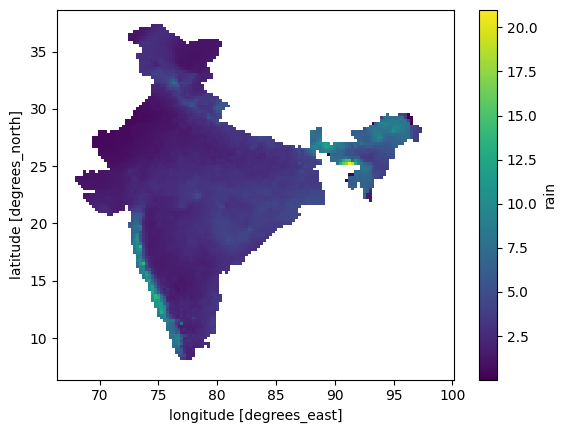

In [8]:
# Remove missing data (-999.0) by replacing it with NaN for easier handling
ds = ds.where(ds['rain'] !=-999)

# Calculate the mean rainfall over time for each latitude and longitude point
mean_rain = ds['rain'].mean('time')

mean_rain.plot()

> Highest Average rainfall in northeast India 

> Significant rainfall in western ghats as well

Dataset dimensions: FrozenMappingWarningOnValuesAccess({'time': 27028, 'lat': 129, 'lon': 135})
Dataset coordinates: Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31

Latitude range in data: 6.5 to 38.5
Longitude range in data: 66.5 to 100.0

Selected region dimensions: FrozenMappingWarningOnValuesAccess({'time': 27028, 'lat': 1, 'lon': 2})
Number of grid points selected: 2


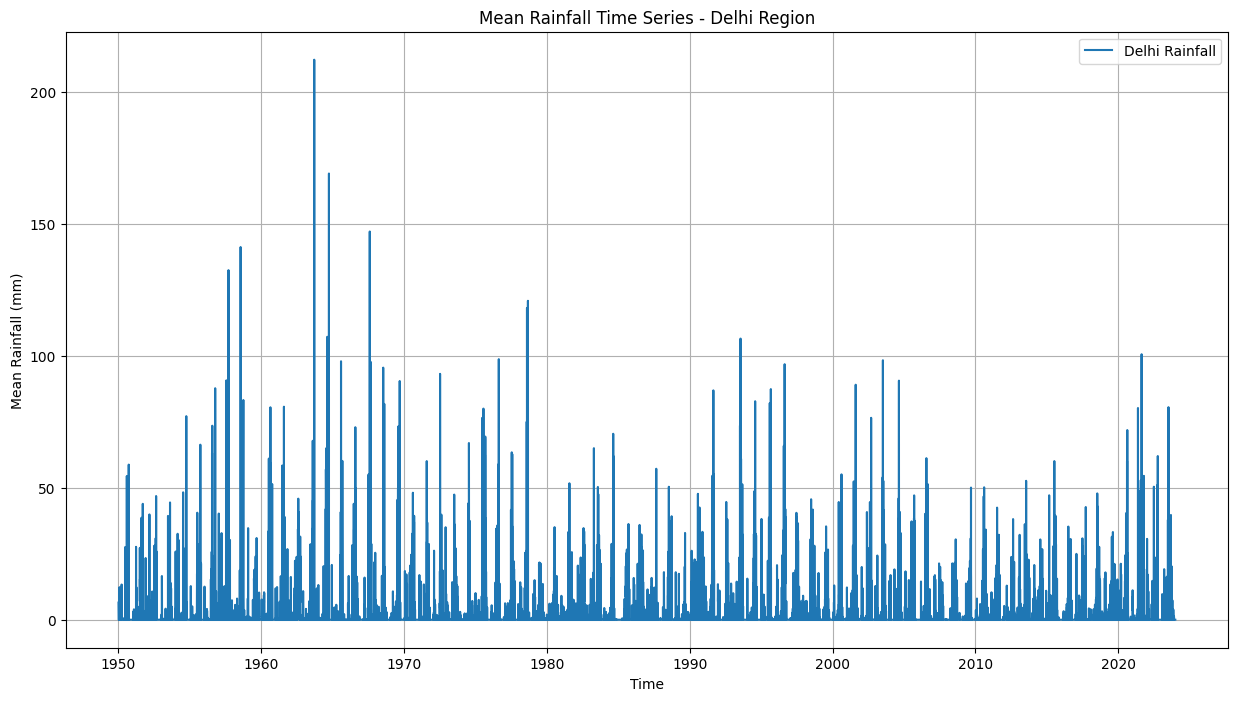

Error: Cannot specify both x and y kwargs for line plots.

Debug information:
Dataset type: <class 'xarray.core.dataset.Dataset'>
Available dimensions: FrozenMappingWarningOnValuesAccess({'time': 27028, 'lat': 129, 'lon': 135})


<Figure size 1500x1200 with 0 Axes>

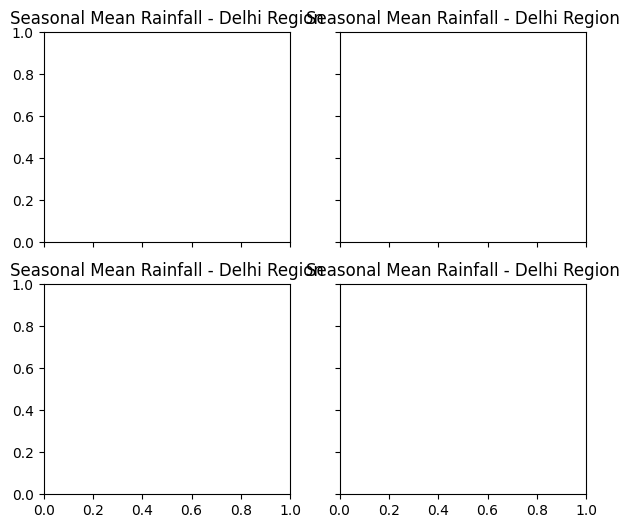

In [12]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def analyze_delhi_rainfall(ds):
    """
    Analyze and visualize rainfall data for Delhi region.
    
    Parameters:
    -----------
    ds : xarray.Dataset
        The dataset containing rainfall data
    """
    # Define Delhi boundaries more precisely
    lat_min, lat_max = 28.6139, 28.8998
    lon_min, lon_max = 76.8370, 77.3486
    
    # Print dataset information for debugging
    print("Dataset dimensions:", ds.dims)
    print("Dataset coordinates:", ds.coords)
    print("\nLatitude range in data:", float(ds.lat.min()), "to", float(ds.lat.max()))
    print("Longitude range in data:", float(ds.lon.min()), "to", float(ds.lon.max()))
    
    # Select Delhi region
    ds_delhi = ds.sel(
        lat=slice(lat_min, lat_max),
        lon=slice(lon_min, lon_max)
    )
    
    # Verify selection worked
    print("\nSelected region dimensions:", ds_delhi.dims)
    print("Number of grid points selected:", ds_delhi.lat.size * ds_delhi.lon.size)
    
    # Remove invalid values
    ds_delhi = ds_delhi.where(ds_delhi['rain'] != -999)
    
    # Calculate mean rainfall over Delhi
    time_series = ds_delhi['rain'].mean(dim=['lat', 'lon'])
    
    # Create time series plot
    plt.figure(figsize=(15, 8))
    time_series.plot(label='Delhi Rainfall')
    plt.title('Mean Rainfall Time Series - Delhi Region')
    plt.xlabel('Time')
    plt.ylabel('Mean Rainfall (mm)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Create seasonal analysis
    ds_seasons = ds_delhi['rain'].groupby('time.season').mean('time')
    
    # Create seasonal spatial plots
    fig = plt.figure(figsize=(15, 12))
    ds_seasons.plot(
        x='lon', 
        y='lat', 
        col='season', 
        col_wrap=2, 
        robust=True,
        subplot_kws={'title': 'Seasonal Mean Rainfall - Delhi Region'},
        cmap='viridis'
    )
    plt.suptitle('Seasonal Rainfall Patterns in Delhi', y=1.02)
    plt.show()
    
    # Export to Excel
    time_series_df = time_series.to_dataframe(name='Mean_Rainfall')
    return time_series_df

# Example usage:
try:
    # Run analysis
    time_series_df = analyze_delhi_rainfall(ds)
    
    # Export to Excel
    output_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\delhi_rainfall_analysis.xlsx'
    time_series_df.to_excel(output_path)
    print(f"\nData exported to: {output_path}")
    
except Exception as e:
    print(f"Error: {str(e)}")
    print("\nDebug information:")
    print("Dataset type:", type(ds))
    if hasattr(ds, 'dims'):
        print("Available dimensions:", ds.dims)

#### Data Parsing and Time series plot

FrozenMappingWarningOnValuesAccess({'time': 27028, 'lat': 129, 'lon': 135})


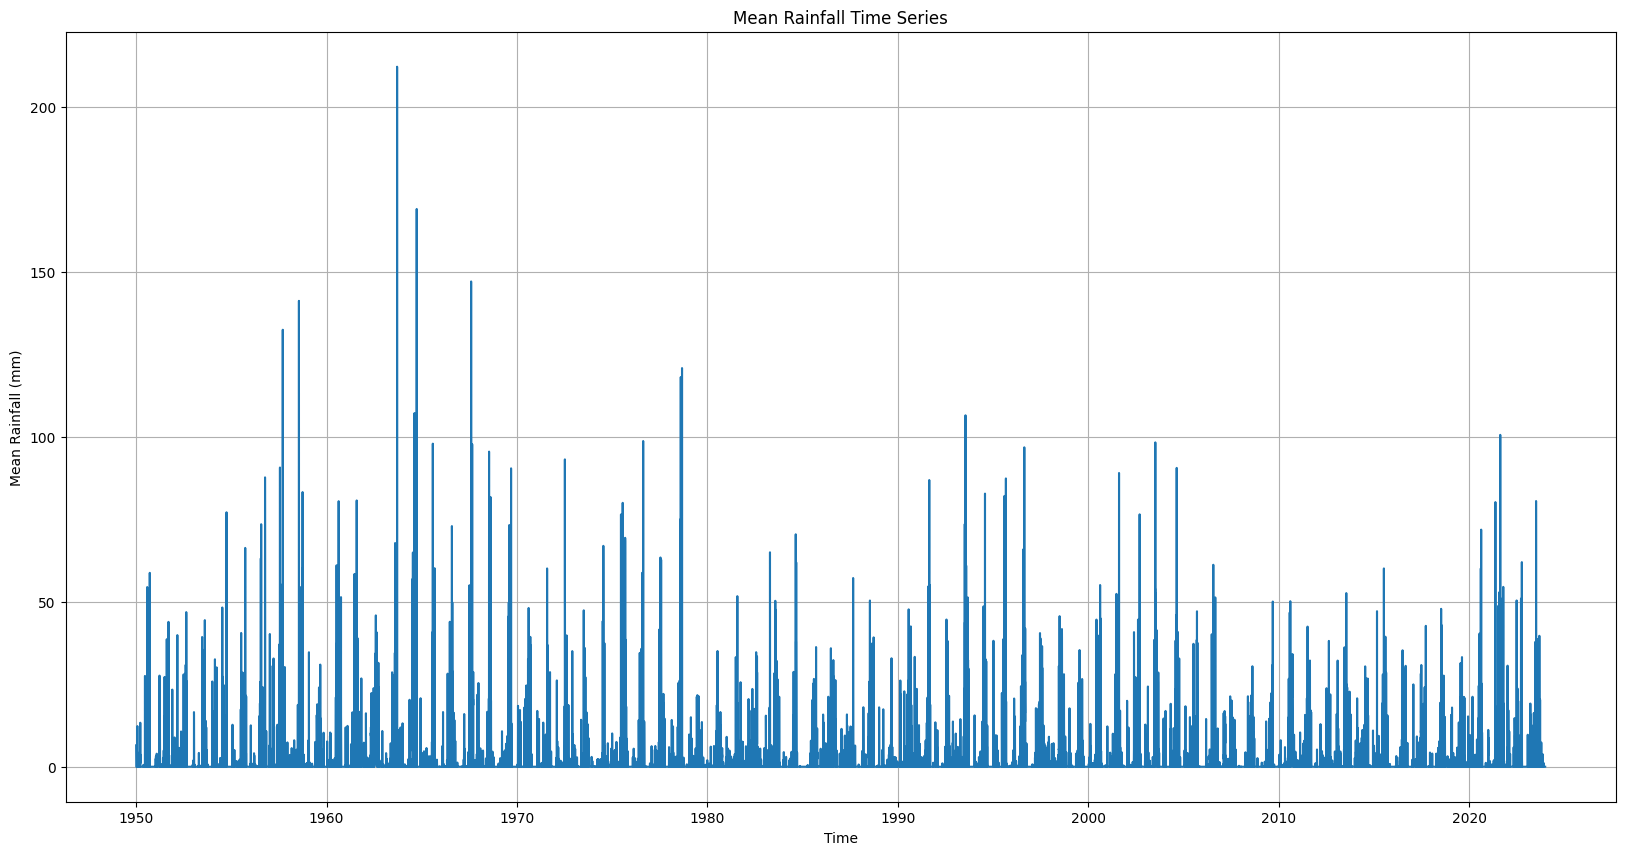

In [9]:
# lat = 22 to 25 and longitude = 80 to 84, covers the study area
# Check the correct names for latitude and longitude in your dataset
print(ds.dims)  # Print available dimensions

# Assuming the correct names are 'lat' and 'lon'
lat_range = slice(28.6139, 28.8998)
lon_range = slice(76.8370, 77.3486)

# Select data within the specified latitude and longitude range
ds_selected = ds.sel(lat=lat_range, lon=lon_range)  # Use the correct dimension names

# Filter out invalid values (if necessary, adjust as per your data)
ds_selected = ds_selected.where(ds_selected['rain'] != -999)

# Calculate mean rainfall over the selected region
time_series = ds_selected['rain'].mean(dim=['lat', 'lon'])  # Use the correct dimension names

# Convert the time series to a pandas DataFrame for exporting
time_series_df = time_series.to_dataframe(name='Mean_Rainfall')

# Export the DataFrame to an Excel file at the specified path
file_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx'
time_series_df.to_excel(file_path)

plt.figure(figsize=(20, 10))

# Plotting the time series
time_series.plot()

# Customize plot labels and title
plt.xlabel('Time')
plt.ylabel('Mean Rainfall (mm)')
plt.title('Mean Rainfall Time Series')


# Show grid
plt.grid(True)

# Show the plot
plt.show()


> Seasonal Consistency: Clear monsoon peaks each year, with slight magnitude variation.

> Stable Trend: Stable mean rainfall over 20 years, with recent increased variability.

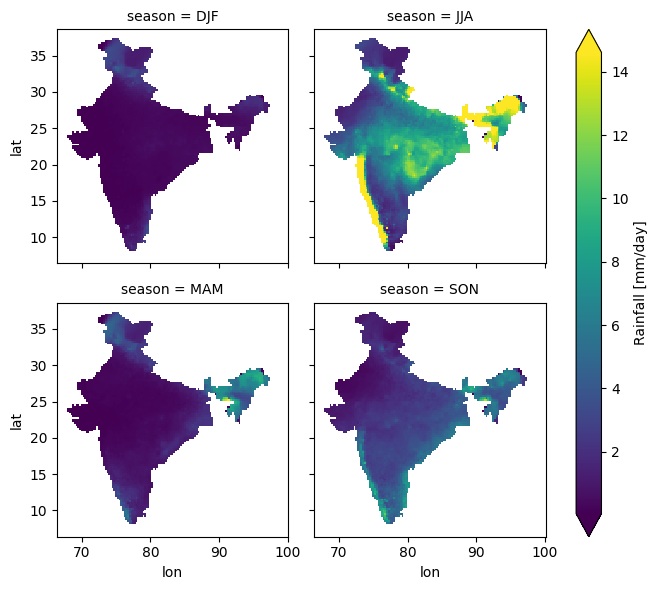

In [11]:
# Group the rainfall data by season and calculate the mean rainfall for each season
ds_seasons = ds['rain'].groupby('time.season').mean('time')

# Plot the mean seasonal rainfall using longitude (lon) for the x-axis and latitude (lat) for the y-axis
# Create separate subplots for each season with a 2-column layout
ds_seasons.plot(x='lon', y='lat', col='season', col_wrap=2, robust=True)
